# Proyek Klasifikasi Gambar: Rice Classification
- **Nama:** Bustanul Khair Rahman
- **Email:** bustanuldarking23@gmail.com
- **ID Dicoding:** bustanul_khair

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-cloud-bigquery 3.31.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [2]:
# Library yang sering digunakan
import os, shutil
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm as tq # untuk menampilkna bar progres saat proses iterasi

# Libraries untuk pemrosesan data gambar
import cv2
from PIL import Image
import skimage
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate, AffineTransform, warp
from skimage import img_as_ubyte
from skimage.exposure import adjust_gamma
from skimage.util import random_noise

# Libraries untuk pembangunan model
import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras import Model, layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.layers import InputLayer, Conv2D, SeparableConv2D, MaxPooling2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

In [3]:
# Untuk menonaktifkan warinig yang mungkin muncul, seperti FutureWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# Mencetak versi TensorFlow yang sedang digunakan
print(tf.__version__)

2.18.0


In [5]:
# Menggunakan Google Colab
!nvidia-smi

Mon Apr 28 05:32:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## Data Preparation

### Data Loading

In [6]:
# Import module yang disediakan google colab untuk kebutuhan upload file

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bustanulkhair","key":"3e36fe8ac6ccada7997213e64e4075a7"}'}

In [7]:
# Buat direktori jika belum ada

os.makedirs("/root/.kaggle", exist_ok=True)

# Pindahkan file ke direktori .kaggle

shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")

# Atur permission agar tidak terlalu terbuka

os.chmod("/root/.kaggle/kaggle.json", 600)


In [8]:
!kaggle datasets download muratkokludataset/rice-image-dataset
!unzip rice-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (55).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (550).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5500).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5501).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5502).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5503).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5504).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5505).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5506).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5507).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5508).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5509).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (551).jpg  
  inflating: Rice_Image_Dataset/Karacadag/Karacadag (5510).jpg  
  inflating: Rice_Image_Dataset/Karacadag/K

### Dataset Checking


In [9]:
import os
import shutil

In [ ]:
# # Direktori awal untuk train dan test
# train_dir = 'Rice_Image_Dataset/train'
# test_dir = 'Rice_Image_Dataset/valid'

# # Direktori baru untuk dataset gabungan
# combined_dir = "Rice_Image_Dataset/dataset"

In [ ]:
# # direktori baru untuk dataset gabungan
# os.makedirs(combined_dir, exist_ok=True)

In [ ]:
# # salin file dan folder dari train
# for category in os.listdir(train_dir):
#   category_dir = os.path.join(train_dir, category)
#   if os.path.isdir(category_dir):
#     shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

# # salin file dan filder dari test
# for category in os.listdir(test_dir):
#   category_dir = os.path.join(test_dir, category)
#   if os.path.isdir(category_dir):
#     if os.path.isdir(category_dir):
#       shutil.copytree(category_dir, os.path.join(combined_dir, category), dirs_exist_ok=True)

[WARNING] Kelas '.ipynb_checkpoints' hanya memiliki 0 gambar. Menampilkan semua.


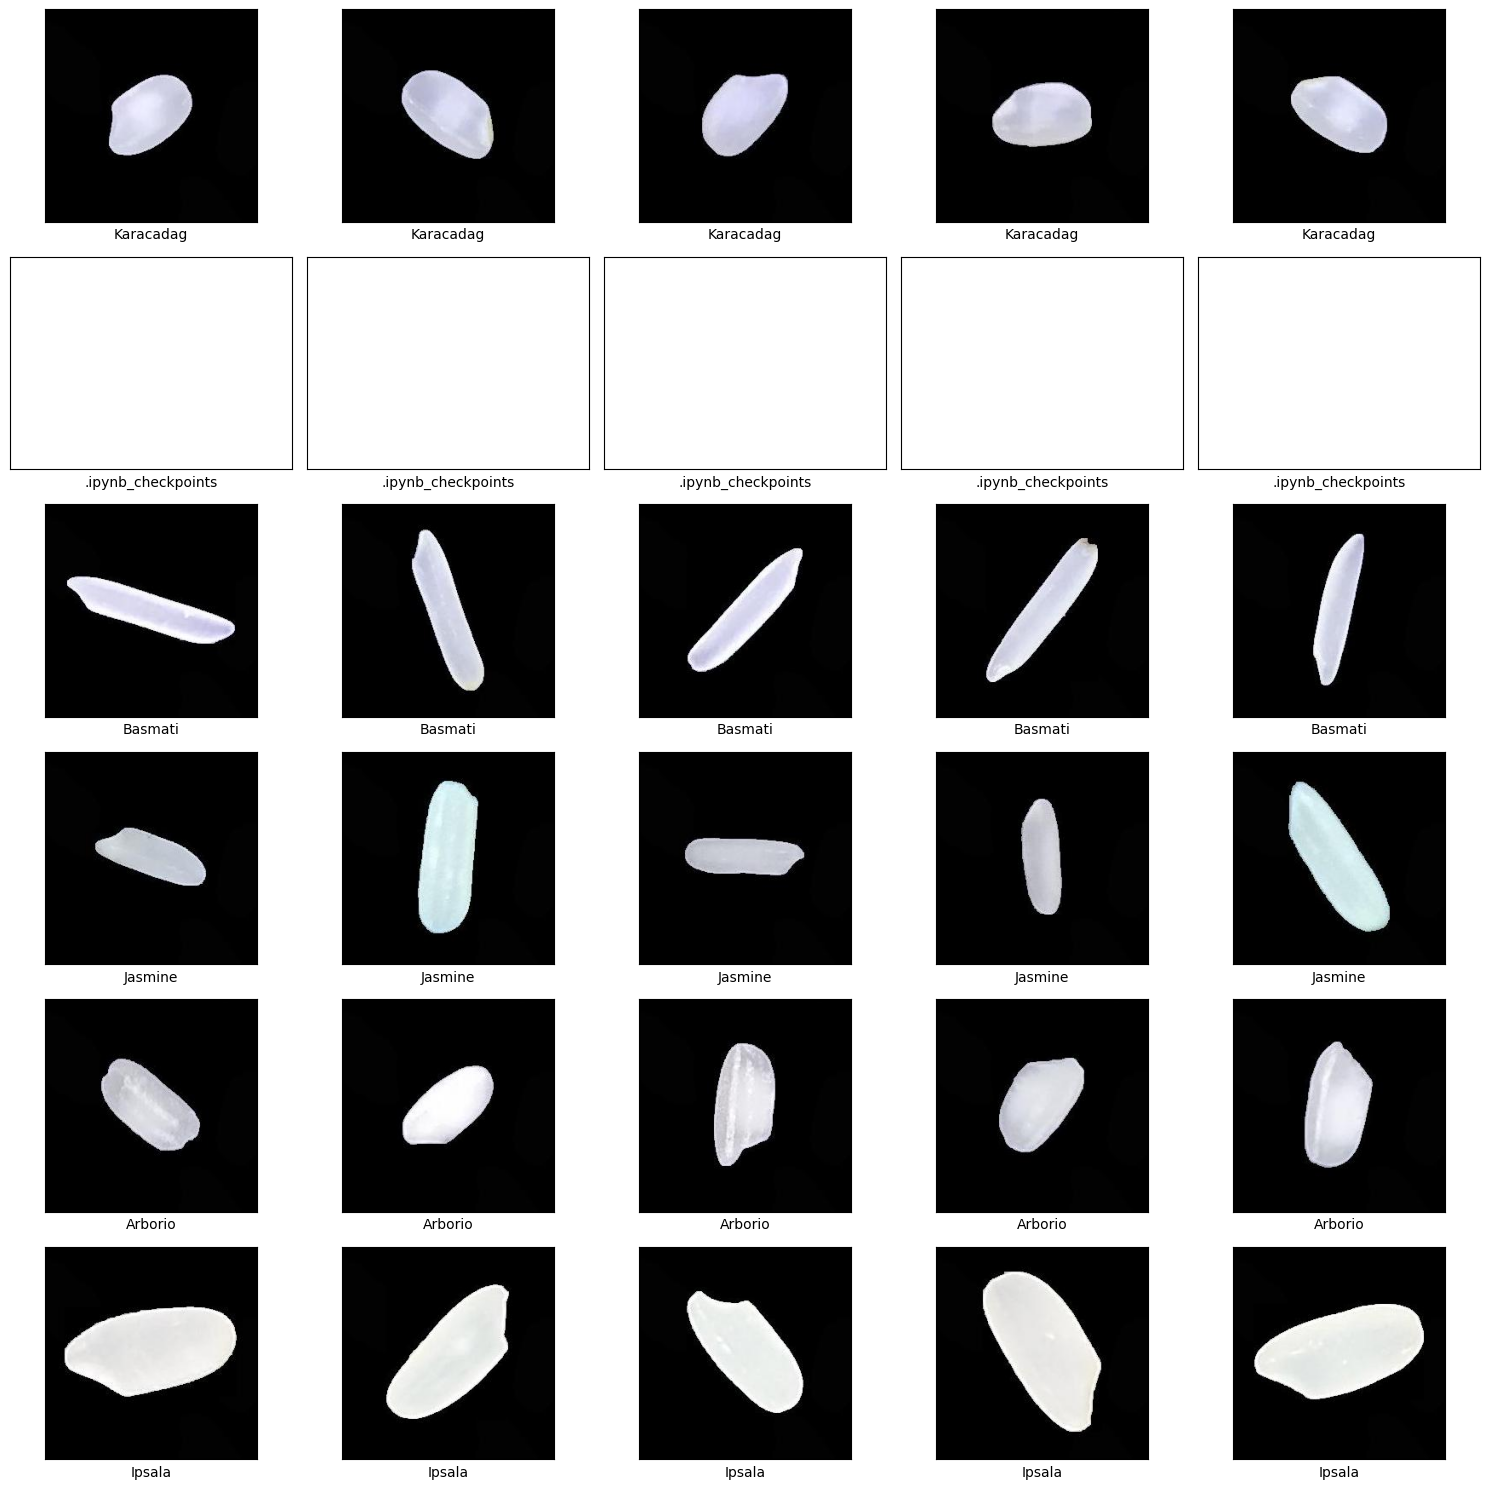

In [10]:
path = 'Rice_Image_Dataset'
rice_image = {}

# Hanya ambil folder (class) yang valid
for i in os.listdir(path):
    class_path = os.path.join(path, i)
    if os.path.isdir(class_path):
        images = os.listdir(class_path)
        rice_image[i] = images

# menampilkan secara acak 5 gambar di bawah setiap kelas dari data
path_sub = "Rice_Image_Dataset"

# menampilkan secarak acak 5 gambar di bawah setiap kelas dari data latih
fig, axs = plt.subplots(len(rice_image.keys()), 5, figsize=(15, 15))

for i, class_name in enumerate(rice_image.keys()):
    images = rice_image[class_name]

    if len(images) >= 5:
        sampled_images = np.random.choice(images, 5, replace=False)
    else:
        print(f"[WARNING] Kelas '{class_name}' hanya memiliki {len(images)} gambar. Menampilkan semua.")
        sampled_images = images + [''] * (5 - len(images))  # padding kosong agar tidak error

    for j, image_name in enumerate(sampled_images):
        ax = axs[i, j]
        if image_name != '':
            img_path = os.path.join(path, class_name, image_name)
            img = Image.open(img_path)
            ax.imshow(img)
        ax.set(xlabel=class_name, xticks=[], yticks=[])

fig.tight_layout()

### Plot Distribusi

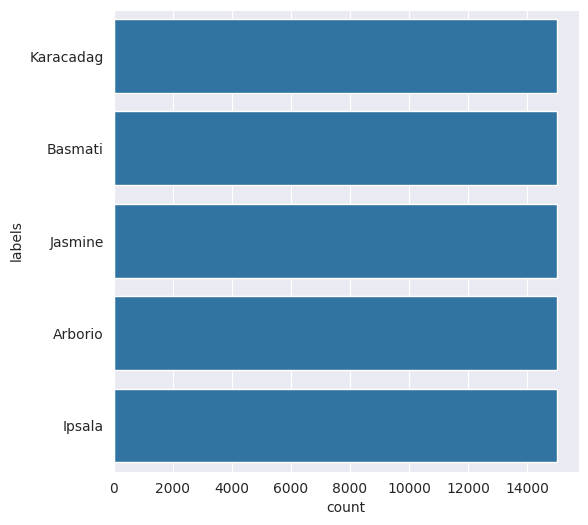

In [11]:
# path sumber
tomato_path = 'Rice_Image_Dataset'

# daftar untuk menyimpan data untuk setiap nama file, path file, dan label dalam data
file_name = []
labels = []
full_path=[]

# mengambil file gamber, path file, dan label
for path, subdirs, files in os.walk(tomato_path):
  for name in files:
    full_path.append(os.path.join(path, name))
    labels.append(path.split('/')[-1])
    file_name.append(name)

distribution_train = pd.DataFrame({"path":full_path, 'file_name':file_name, 'labels':labels})

# plot distribusi
Label = distribution_train['labels']
plt.figure(figsize = (6, 6))
sns.set_style("darkgrid")
plot_data = sns.countplot(Label)

### Data Preprocessing

#### Data Augmentation

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random
from skimage.transform import resize
from skimage.filters import gaussian
from skimage import img_as_float

# Membuat fungsi untuk melakukan rotasi berlawanan arah jarum jam
def anticlockwise_rotation(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.rot90(img, k=random.randint(1, 4))  # Rotasi 90, 180, atau 270 derajat secara acak
    return img

# Membuat fungsi untuk melakukan rotasi searah jarum jam
def clockwise_rotation(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.rot90(img, k=random.randint(1, 4))  # Rotasi 90, 180, atau 270 derajat secara acak
    return img

# Membuat fungsi untuk membalik gambar secara vertikal dari atas ke bawah
def flip_up_down(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.flip_up_down(img)
    return img

# Membuat fungsi untuk memberikan efek peningkatan kecerahan pada gambar
def add_brightness(img):
    img = tf.image.resize(img, (224, 224))
    img = tf.image.adjust_brightness(img, delta=random.uniform(0.1, 0.5))  # Sesuaikan nilai delta sesuai kebutuhan
    return img

# Membuat fungsi untuk memberikan efek blur pada gambar
def blur_image(img):
    img = resize(img, (224, 224), preserve_range=True)
    img = img_as_float(img)  # pastikan nilainya antara 0 dan 1
    img = gaussian(img, sigma=1, channel_axis=-1)  # jika RGB, pastikan channel_axis benar
    return img

# Membuat fungsi untuk memberikan efek pergeseran acak pada gambar
def sheared(img):
    img = tf.image.resize(img, (224, 224))
    # Buat objek ImageDataGenerator dengan parameter shearing range
    datagen = ImageDataGenerator(shear_range=0.2)
    img = next(iter(datagen.flow(tf.expand_dims(img, 0))))[0]
    return img

# Membuat fungsi untuk melakukan pergeseran melengkung pada gambar
def warp_shift(img):
    img = tf.image.resize(img, (224, 224))
    # Buat objek ImageDataGenerator dengan parameter width_shift_range dan height_shift_range
    datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)
    img = next(iter(datagen.flow(tf.expand_dims(img, 0))))[0]
    return img

In [ ]:
# transformations = {
#     'rotate anticlockwise': anticlockwise_rotation,
#     'rotate clockwise': clockwise_rotation,
#     'warp shift': warp_shift,
#     'blurring image': blur_image,
#     'add brightness': add_brightness,
#     'flip up down': flip_up_down,
#     'shear image': sheared
# }

# images_path = "tomato_disease/dataset/powdery_mildew"  # Path for the original image
# augmented_path = "tomato_disease/dataset/powdery_mildew_augmented"  # Path to put the augmented image
# images = []  # To save images that have been preprocessed from the folder

# # Baca nama gambar dari folder dan tambahkan path ke dalam array "images"
# for im in os.listdir(images_path):
#     images.append(os.path.join(images_path, im))

# # Jumlah gambar yang akan ditambahkan dengan hasil transformasi augmentasi
# images_to_generate = 2000
# i = 1

# while i <= images_to_generate:
#     image = random.choice(images)
#     try:
#         original_image = io.imread(image)

#         # Memeriksa apakah gambar memiliki dimensi yang valid (3 atau 4 dimensi)
#         if original_image.ndim not in [3, 4]:
#             raise ValueError('Invalid image dimensions')

#         transformed_image = None
#         n = 0  # Variabel untuk melakukan iterasi sampai jumlah transformasi yang akan diterapkan
#         transformation_count = random.randint(1, len(transformations))  # Pilih jumlah transformasi acak yang akan diterapkan pada gambar

#         while n <= transformation_count:
#             key = random.choice(list(transformations))  # Secara acak memilih dan memanggil metode
#             transformed_image = transformations[key](original_image)
#             n = n + 1

#         new_image_path = "%s/augmented_image_%s.jpg" % (augmented_path, i)
#         transformed_image = img_as_ubyte(transformed_image)  # Mengonversi gambar ke format byte yang tidak ditandatangani, dengan nilai dalam [0, 255]
#         cv2.imwrite(new_image_path, transformed_image)  # Simpan hasil transformasi augmentasi pada gambar ke path yang ditentukan
#         i = i + 1
#     except ValueError as e:
#         print('Could not read or process the image', image, ':', e, 'hence skipping it.')

In [ ]:
# # Define source path
# tomato_path = "tomato_disease/dataset/"

# # Create a list that stores data for each filenames, filepaths, and labels in the data
# file_name = []
# labels = []
# full_path = []

# # Get data image filenames, filepaths, labels one by one with looping, and store them as dataframe
# for path, subdirs, files in os.walk(tomato_path):
#     for name in files:
#         full_path.append(os.path.join(path, name))
#         labels.append(path.split('/')[-1])
#         file_name.append(name)

# distribution_train = pd.DataFrame({"path":full_path,'file_name':file_name,"labels":labels})

# # Plot the distribution of images across the classes
# Label = distribution_train['labels']
# plt.figure(figsize = (6,6))
# sns.set_style("darkgrid")
# plot_data = sns.countplot(Label)

#### Split Dataset

In [12]:
mypath = 'Rice_Image_Dataset'

file_name = []
labels = []
full_path = []
for path, subdirs, files in os.walk(mypath):
  for name in files:
    full_path.append(os.path.join(path, name))
    labels.append(path.split('/')[-1])
    file_name.append(name)

df = pd.DataFrame({'path':full_path, 'file_name':file_name, 'labels':labels})
df.groupby(['labels']).size()


,0
labels,
Arborio,15000
Basmati,15000
Ipsala,15000
Jasmine,15000
Karacadag,15000


In [13]:
X = df['path']
y = df['labels']

# Step 1: Split jadi train (80%) dan temp (val+test 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=300, stratify=y)

# Step 2: Split temp jadi val dan test, masing-masing 50% dari temp (10% dari total awal)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=300, stratify=y_temp)

In [14]:
# menyatukan ke dalam masing masing dataframe
df_train = pd.DataFrame({'path':X_train, 'labels':y_train,'set':'train'})
df_test = pd.DataFrame({'path':X_test, 'labels':y_test,'set':'test'})
df_val = pd.DataFrame({'path':X_val, 'labels':y_val,'set':'val'})

In [15]:
# Print hasil diatas untuk melihat panjang size data training dan testing
print('train_size',len(df_train))
print('test_size',len(df_test))
print('val_size',len(df_val))


train_size 60000
test_size 7500
val_size 7500


In [16]:
# Gabungkan DataFrame df_tr dan df_te
df_all = pd.concat([df_train, df_test, df_val], ignore_index=True)

print('===================================================== \n')
print(df_all.groupby(['set', 'labels']).size(), '\n')
print('===================================================== \n')

# Cek sample data
print(df_all.sample(5))


set    labels   
test   Arborio       1500
       Basmati       1500
       Ipsala        1500
       Jasmine       1500
       Karacadag     1500
train  Arborio      12000
       Basmati      12000
       Ipsala       12000
       Jasmine      12000
       Karacadag    12000
val    Arborio       1500
       Basmati       1500
       Ipsala        1500
       Jasmine       1500
       Karacadag     1500
dtype: int64 


                                                path   labels    set
43292     Rice_Image_Dataset/Basmati/basmati (2).jpg  Basmati  train
74269  Rice_Image_Dataset/Arborio/Arborio (8211).jpg  Arborio    val
34857    Rice_Image_Dataset/Ipsala/Ipsala (5361).jpg   Ipsala  train
4182   Rice_Image_Dataset/Basmati/basmati (4647).jpg  Basmati  train
70889  Rice_Image_Dataset/Basmati/basmati (2880).jpg  Basmati    val


In [17]:
# memanggil dataset asli
datasource_path = 'Rice_Image_Dataset/dataset/'
# membuat variabel dataset, tampat menampung data yng telah dilakukan split
dataset_path = 'Dataset-Final/'

In [18]:
for index, row in tq(df_all.iterrows()):
  # Deteksi filepath
  file_path = row['path']
  if os.path.exists(file_path) == False:
    file_path = os.path.join(datasource_path, row['labels'], row['iamge'].split('.')[0])

  # buat direktori tujuan folder
  if os.path.exists(os.path.join(dataset_path, row['set'], row['labels'])) == False:
    os.makedirs(os.path.join(dataset_path, row['set'], row['labels']))

  # tentukan tujuan file
  destination_file_name = file_path.split('/')[-1]
  file_dest = os.path.join(dataset_path, row['set'], row['labels'], destination_file_name)

  # salin file dari sumber ke tujuan
  if os.path.exists(file_dest) == False:
    shutil.copy2(file_path, file_dest)

0it [00:00, ?it/s]

## Image Data Generator

In [19]:
# definisikan direktori
TRAIN_DIR = 'Dataset-Final/train/'
TEST_DIR = 'Dataset-Final/test/'
VAL_DIR = 'Dataset-Final/val/'

# Ambil semua nama kelas dari folder train
classes = os.listdir(TRAIN_DIR)

# Buat dictionary untuk menyimpan jumlah gambar per kelas
train_counts = {}
test_counts = {}
val_counts = {}

for cls in classes:
    train_path = os.path.join(TRAIN_DIR, cls)
    test_path = os.path.join(TEST_DIR, cls)
    val_path = os.path.join(VAL_DIR, cls)

    train_counts[cls] = len(os.listdir(train_path))
    test_counts[cls] = len(os.listdir(test_path))
    val_counts[cls] = len(os.listdir(val_path))


# Tampilkan jumlah gambar per kelas
print("Jumlah gambar pada dataset training:")
for cls, count in train_counts.items():
    print(f"{cls}: {count}")

print("\nJumlah gambar pada dataset testing:")
for cls, count in test_counts.items():
    print(f"{cls}: {count}")

print("\nJumlah gambar pada dataset validation:")
for cls, count in val_counts.items():
    print(f"{cls}: {count}")

Jumlah gambar pada dataset training:
Karacadag: 12000
Basmati: 12000
Jasmine: 12000
Arborio: 12000
Ipsala: 12000

Jumlah gambar pada dataset testing:
Karacadag: 1500
Basmati: 1500
Jasmine: 1500
Arborio: 1500
Ipsala: 1500

Jumlah gambar pada dataset validation:
Karacadag: 1500
Basmati: 1500
Jasmine: 1500
Arborio: 1500
Ipsala: 1500


In [20]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
# objek ImageDataGenerator yang menormalkan gambar
datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory(TRAIN_DIR,
                                              batch_size=32,
                                              target_size=(150, 150),
                                              color_mode='grayscale',
                                              class_mode='categorical',
                                              shuffle=True)

validation_generator = datagen.flow_from_directory(VAL_DIR,
                                                   batch_size=32,
                                                   target_size=(150, 150),
                                                   color_mode='grayscale',
                                                   class_mode='categorical',
                                                   shuffle=False)

test_generator = test_datagen.flow_from_directory(TEST_DIR,
                                                  batch_size=1,
                                                  target_size=(150, 150),
                                                  color_mode='grayscale',
                                                  class_mode='categorical',
                                                  shuffle=False)

Found 60000 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.
Found 7500 images belonging to 5 classes.


## Modelling

### Skema 1 - CNN Architecture

In [21]:
model_1 = Sequential()

# 1st
model_1.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(150, 150, 1)))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D((2, 2)))

# 2nd
model_1.add(Conv2D(32, (4, 4), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D((2, 2)))

# 3rd
model_1.add(Conv2D(32, (7, 7), padding='same', activation='relu'))
model_1.add(BatchNormalization())
model_1.add(MaxPooling2D((2, 2)))

model_1.add(Flatten())
model_1.add(Dense(128, activation='relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.3))
model_1.add(Dense(5, activation='softmax'))

# compiler
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001,), loss='categorical_crossentropy', metrics=['accuracy'])
print(model_1.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 150, 150, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │        32,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 18, 18, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10368)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,327,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,419,973 (5.42 MB)

 Trainable params: 1,419,717 (5.42 MB)

 Non-trainable params: 256 (1.00 KB)

None


In [22]:
# Ambil nama kelas
classes = os.listdir(TRAIN_DIR)

# Hitung jumlah gambar tiap kelas
class_counts = {cls: len(os.listdir(os.path.join(TRAIN_DIR, cls))) for cls in classes}

# Total semua data
total = sum(class_counts.values())

# Hitung class_weights
class_weights = {
    i: (1 / count) * (total / len(class_counts))
    for i, (cls, count) in enumerate(class_counts.items())
}

# Buat mapping label kelas ke index (yang sesuai dengan class_indices dari ImageDataGenerator)
class_indices = {cls: i for i, cls in enumerate(sorted(classes))}

print("Class indices:", class_indices)
print("Class weights:", class_weights)

Class indices: {'Arborio': 0, 'Basmati': 1, 'Ipsala': 2, 'Jasmine': 3, 'Karacadag': 4}
Class weights: {0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0}


In [23]:
# callbacks
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fitting / Training model
history_1 = model_1.fit(train_generator,
                        epochs=30,
                        batch_size=32,
                        validation_data=validation_generator,
                        class_weight= class_weights,
                        callbacks=[checkpoint, early_stopping])

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7026 - loss: 0.7821

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 41ms/step - accuracy: 0.7026 - loss: 0.7819 - val_accuracy: 0.9693 - val_loss: 0.1631
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.8771 - loss: 0.3241 - val_accuracy: 0.9669 - val_loss: 0.1679
Epoch 3/30
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9049 - loss: 0.2458

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9049 - loss: 0.2458 - val_accuracy: 0.9828 - val_loss: 0.0875
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9192 - loss: 0.2028 - val_accuracy: 0.9701 - val_loss: 0.1143
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9169 - loss: 0.2063 - val_accuracy: 0.9768 - val_loss: 0.0894
Epoch 6/30
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9263 - loss: 0.1776

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 41ms/step - accuracy: 0.9263 - loss: 0.1776 - val_accuracy: 0.9831 - val_loss: 0.0758
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - accuracy: 0.9291 - loss: 0.1657 - val_accuracy: 0.9532 - val_loss: 0.1521
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9311 - loss: 0.1504 - val_accuracy: 0.9819 - val_loss: 0.0783
Epoch 9/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9291 - loss: 0.1349

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.9291 - loss: 0.1349 - val_accuracy: 0.9820 - val_loss: 0.0726
Epoch 10/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9451 - loss: 0.1290

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9451 - loss: 0.1290 - val_accuracy: 0.9867 - val_loss: 0.0508
Epoch 11/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9635 - loss: 0.0958 - val_accuracy: 0.9539 - val_loss: 0.1186
Epoch 12/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9737 - loss: 0.0824 - val_accuracy: 0.9859 - val_loss: 0.0534
Epoch 13/30
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9782 - loss: 0.0696

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 38ms/step - accuracy: 0.9782 - loss: 0.0696 - val_accuracy: 0.9852 - val_loss: 0.0462
Epoch 14/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9835 - loss: 0.0587 - val_accuracy: 0.9788 - val_loss: 0.0726
Epoch 15/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 40ms/step - accuracy: 0.9822 - loss: 0.0609 - val_accuracy: 0.9804 - val_loss: 0.0571
Epoch 16/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9845 - loss: 0.0540 - val_accuracy: 0.9804 - val_loss: 0.0772
Epoch 17/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9844 - loss: 0.0527 - val_accuracy: 0.9893 - val_loss: 0.0468
Epoch 18/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 38ms/step - accuracy: 0.9865 - loss: 0.0446 - val_accuracy: 0.9837 - val_loss: 0.0627


## Evaluasi dan Visualisasi

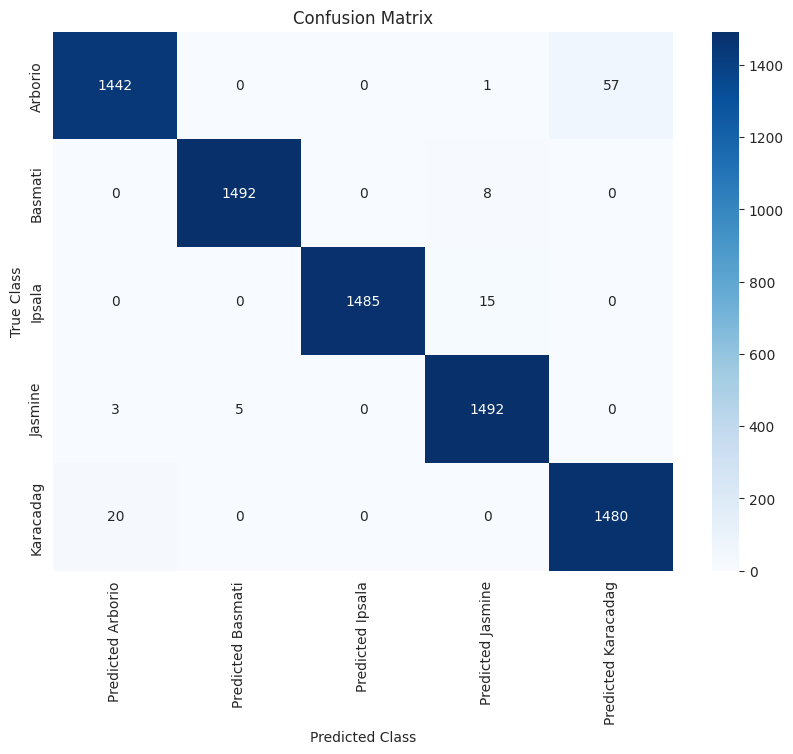


Classification Report:

              precision    recall  f1-score   support

     Arborio     0.9843    0.9613    0.9727      1500
     Basmati     0.9967    0.9947    0.9957      1500
      Ipsala     1.0000    0.9900    0.9950      1500
     Jasmine     0.9842    0.9947    0.9894      1500
   Karacadag     0.9629    0.9867    0.9746      1500

    accuracy                         0.9855      7500
   macro avg     0.9856    0.9855    0.9855      7500
weighted avg     0.9856    0.9855    0.9855      7500



In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Reset generator agar prediksi dimulai dari awal
test_generator.reset()

# Prediksi model
preds_1 = model_1.predict(test_generator, verbose=0)

# Ambil prediksi kelas (argmax karena multi-class)
predicted_classes = np.argmax(preds_1, axis=1)

# Label ground truth dari generator
true_classes = test_generator.classes

# Nama kelas (harus sesuai urutan class_indices dari generator)
class_labels = list(test_generator.class_indices.keys())  # Contoh: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

# Print Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
cm_df = pd.DataFrame(cm, index=class_labels, columns=[f'Predicted {label}' for label in class_labels])

plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# Print Classification Report
print("\nClassification Report:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels, digits=4))


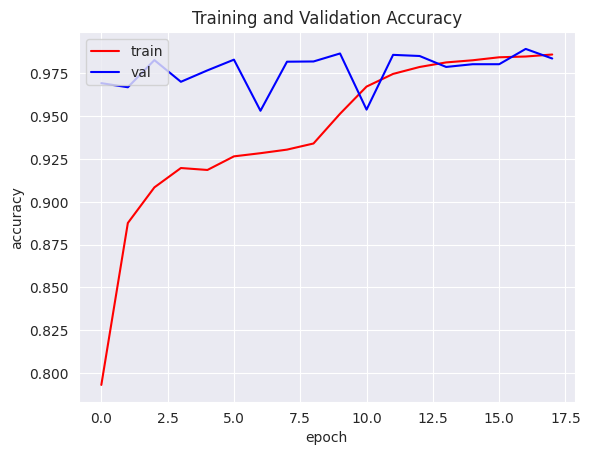

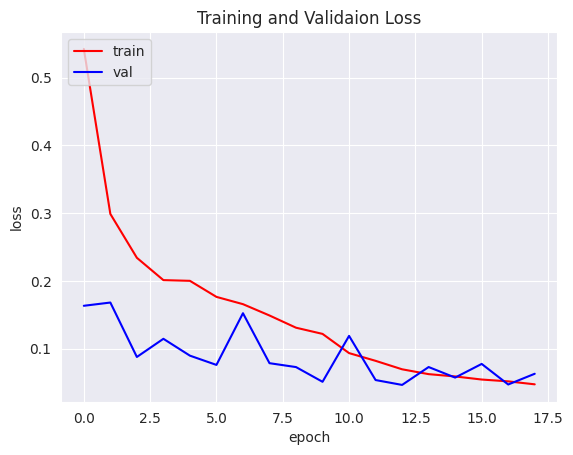

In [25]:
acc = history_1.history['accuracy']
val_acc = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.show()

## Konversi Model

### SaveModel

In [26]:
save_path = 'mymodel/'
tf.saved_model.save(model_1, save_path)

### Format tf.js

In [27]:
!tensorflowjs_converter \
    --input_format=tf_saved_model \
    /content/mymodel/ \
    /content/modeltfjs

2025-04-28 05:57:42.311487: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745819862.331449    7593 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745819862.337370    7593 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-04-28 05:57:47.993001: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1745819867.993170    7593 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

### Format tflite


In [33]:
converter = tf.lite.TFLiteConverter.from_saved_model("mymodel")
tflite_model = converter.convert()

with tf.io.gfile.GFile('rice_classification.tflite', 'wb') as f:
    f.write(tflite_model)

## Inference (Optional)

7500/7500 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step


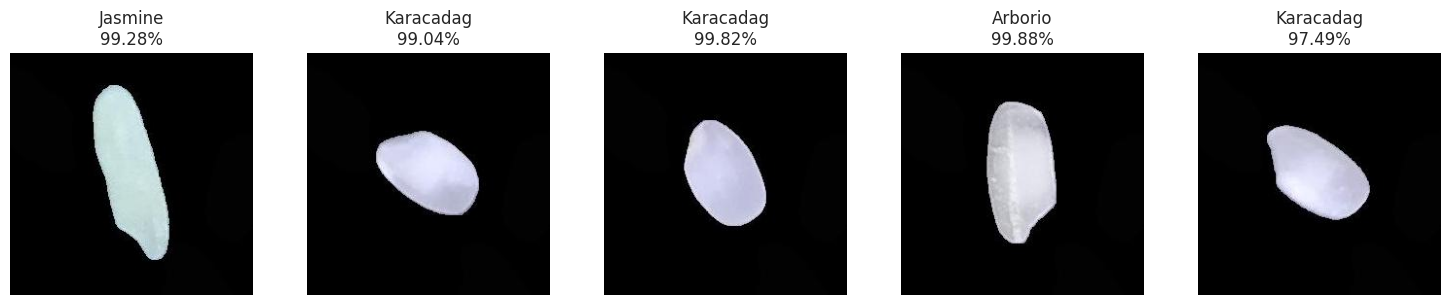

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import random

# Ambil probabilitas prediksi dari model
probabilities = model_1.predict(test_generator, verbose=1)

# Ambil label kelas dari generator
class_labels = list(test_generator.class_indices.keys())  # contoh: ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

# Pilih 5 gambar acak dari dataset
random_indices = random.sample(range(len(test_generator.filenames)), 5)

# Atur layout gambar dalam 1 baris
plt.figure(figsize=(15, 3))

for i, index in enumerate(random_indices):
    probability = probabilities[index]
    image_path = os.path.join(TEST_DIR, test_generator.filenames[index])
    img = mpimg.imread(image_path)

    # Prediksi dan ambil label dengan probabilitas tertinggi
    predicted_class_index = np.argmax(probability)
    confidence = probability[predicted_class_index] * 100
    predicted_label = class_labels[predicted_class_index]

    # Tampilkan gambar dengan judul prediksi
    plt.subplot(1, 5, i+1)  # 1 baris, 5 kolom, gambar ke-i
    plt.imshow(img)
    plt.axis('off')  # Matikan axis
    plt.title(f"{predicted_label}\n{confidence:.2f}%")

plt.tight_layout()  # Mengatur layout agar gambar tidak bertumpuk
plt.show()


In [ ]:
!pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.5.2
aiohappyeyeballs==2.6.1
aiohttp==3.11.15
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==4.9.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.21.0
astropy==7.0.1
astropy-iers-data==0.2025.4.21.0.37.6
astunparse==1.6.3
atpublic==5.1
attrs==25.3.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
backports.tarfile==1.2.0
beautifulsoup4==4.13.4
betterproto==2.0.0b6
bigframes==2.1.0
bigquery-magics==0.9.0
bleach==6.2.0
blinker==1.9.0
blis==1.3.0
blosc2==3.3.1
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confect